# Lab2
## Task1
First, we have to import the data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [18]:
# get both sheets from the provided ods file
sheet4 = pd.read_excel('data/ua2020_source.ods', 'Sheet4')
pivot_table_sheet4_1 = pd.read_excel('data/ua2020_source.ods', 'Pivot Table_Sheet4_1')

pivot_table_sheet4_1.head()

,Sum - val,Unnamed: 1,Data,index_abbr,index_name,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165
0,NaN,NaN,AHP,NaN,AIDS,NaN,AIR201,NaN,BN,NaN,...,NaN,WSU171,NaN,WSU172,NaN,WTP171,NaN,WTP172,NaN,Total Result
1,NaN,NaN,Рівень забезпеченості житлом,NaN,Чисельність ВІЛ-інфікованих,NaN,Комплексний індекс забруднення атмосфери усере...,NaN,Безробітне населення,NaN,...,NaN,Утилізування і перероблення відходів I-III кл...,NaN,Утилізування і перероблення відходів IV класу...,NaN,Частка забирання прісної води із природних вод...,NaN,Скидання забруднених зворотних вод у поверхнев...,NaN,NaN
2,region_name,region_abbr,2017,2018.000000,2017,2018.000,2017,2018.0,2017,2018.0,...,2018.000,2017,2018.0,2017,2018.00000,2017,2018.000,2017,2018.000,NaN
3,АР Крим,UA.KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.74
4,Вінницька,UA.VI,30.3818,0.030463,0.323,0.215,4.53,4.8,10.7,9.9,...,95.297,0,0.0,1.31522,3.14984,4.666,4.674,2.299,2.299,2071521.845493


In [19]:
regions = pivot_table_sheet4_1.iloc[3:-1, 0]
column_names = pivot_table_sheet4_1.iloc[1, 2:]
print(regions)
data = pivot_table_sheet4_1.iloc[3:-1, 2:]
min_max_scaler = MinMaxScaler()
scaled_data_np = min_max_scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data_np)
print(scaled_data.shape)

3               АР Крим
4             Вінницька
5             Волинська
6      Дніпропетровська
7              Донецька
8           Житомирська
9          Закарпатська
10           Запорізька
11    Івано-Франківська
12                 Київ
13             Київська
14       Кіровоградська
15            Луганська
16            Львівська
17         Миколаївська
18              Одеська
19           Полтавська
20           Рівненська
21          Севастополь
22              Сумська
23        Тернопільська
24           Харківська
25           Херсонська
26          Хмельницька
27            Черкаська
28          Чернівецька
29         Чернігівська
Name: Sum - val, dtype: object
(27, 164)


In [20]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.218085,0.218085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000007
1,0.804778,0.784352,0.066189,0.128231,0.151277,0.173578,0.438095,0.469388,0.057751,0.057751,...,0.129676,0.000000,0.000000,0.001818,0.004387,0.011413,0.006463,0.000534,0.000428,0.139312
2,0.549076,0.544356,0.048997,0.162028,0.618861,0.713597,0.609524,0.622449,0.470365,0.470365,...,0.160716,0.000122,0.000245,0.000595,0.000853,0.007020,0.003810,0.000000,0.000111,0.068633
3,0.569013,0.544858,1.000000,0.978131,0.905697,1.000000,0.228571,0.275510,0.009119,0.009119,...,0.031865,0.326815,0.277288,1.000000,1.000000,0.253613,0.164189,0.034351,0.034968,0.411143
4,0.134672,0.129545,0.395989,0.293241,1.000000,0.975892,0.809524,0.887755,0.183891,0.183891,...,0.054033,1.000000,0.783653,0.043229,0.061199,0.320278,0.231181,0.156600,0.146060,0.479190


Finally, we can draw graphs of these indicators: the number of HIV-infected, unemployed population, the total number
of victims of crime, Internet subscribers, environmental pollution and the average monthly salary.

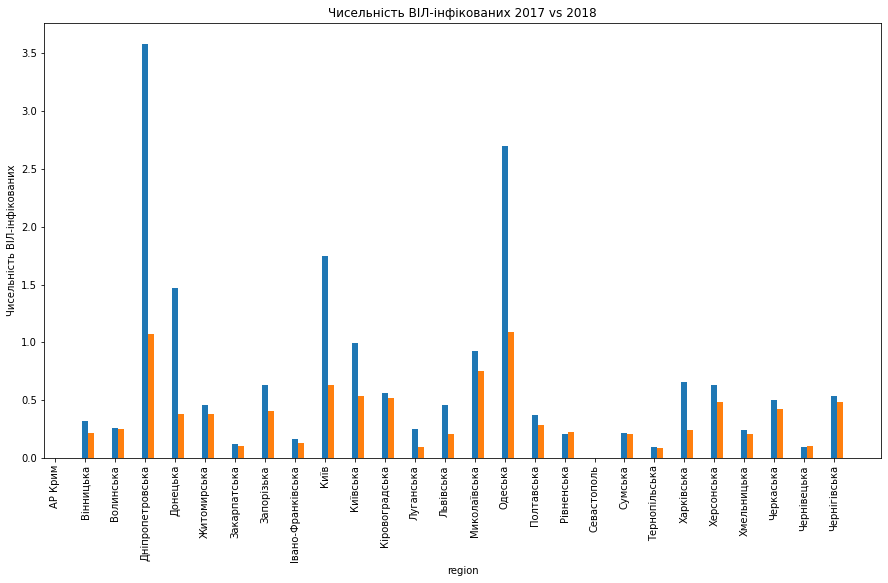

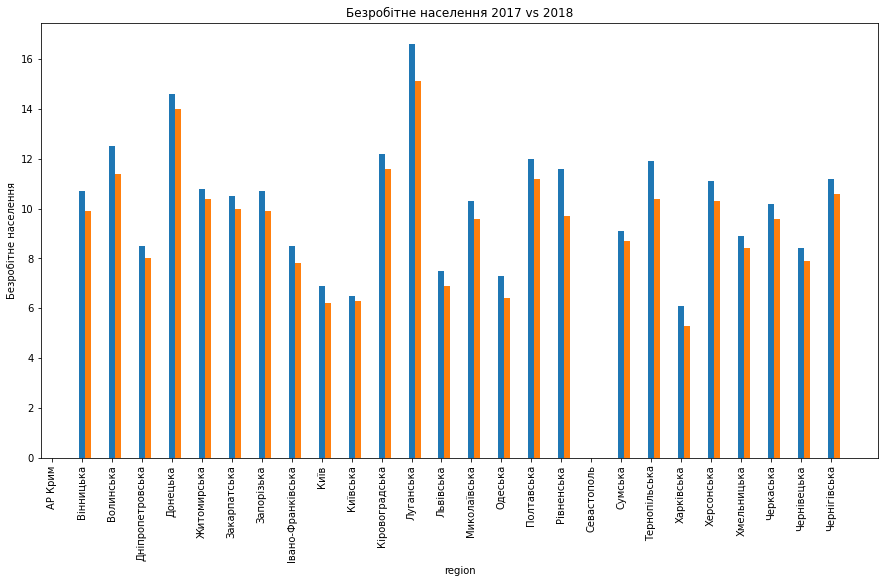

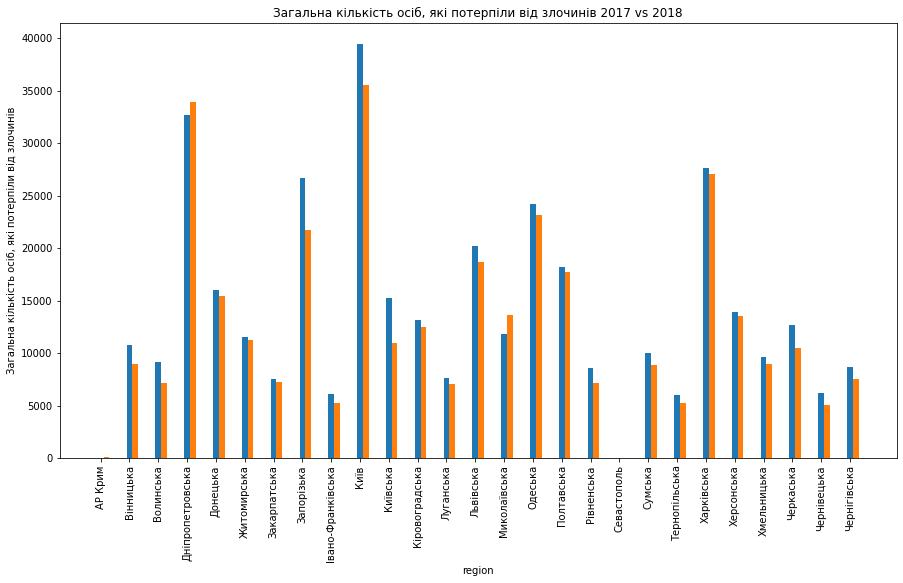

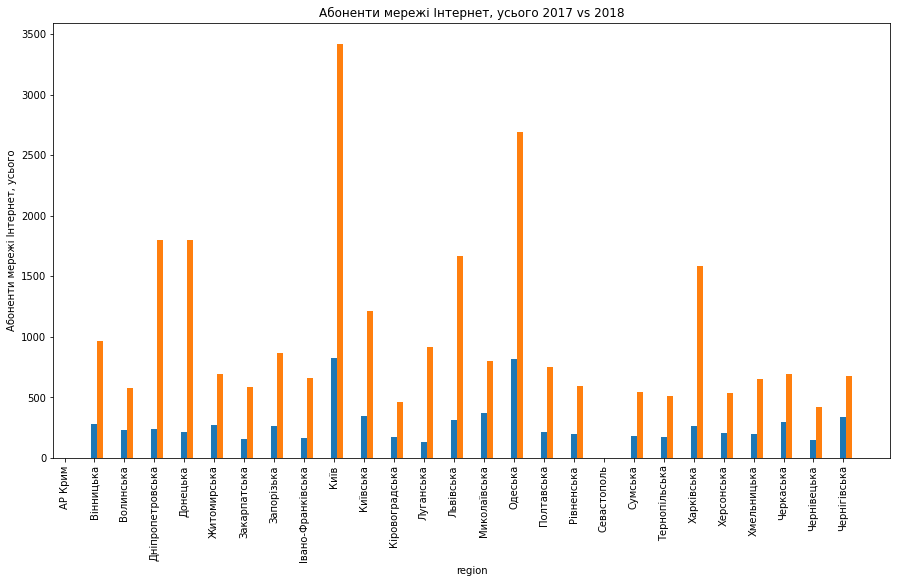

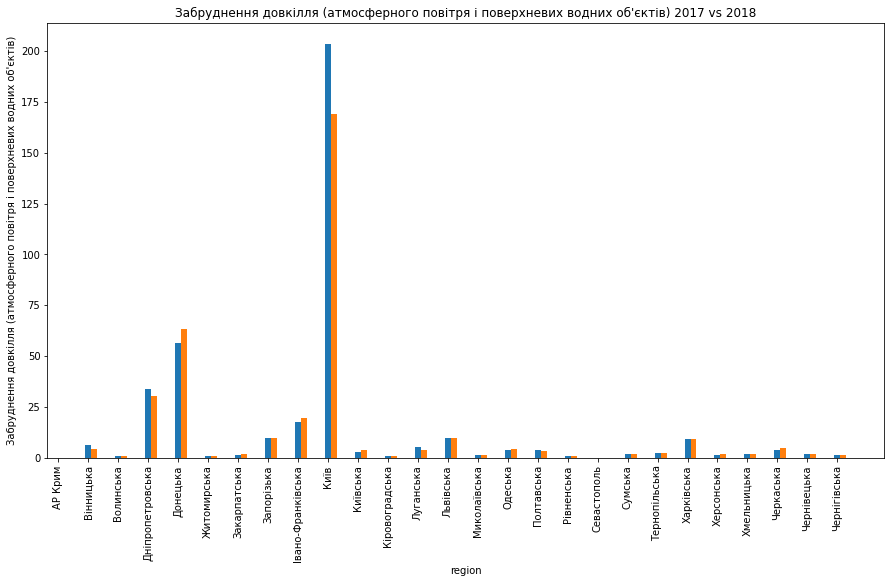

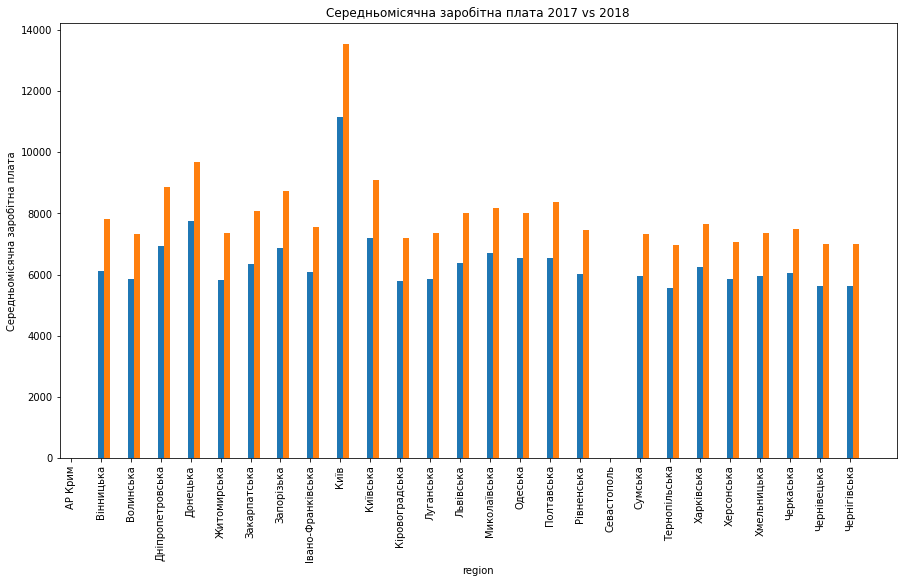

In [22]:
def draw_comparison_graph(data, regions, column_names, col_idx):
    col_2017 = data.iloc[:, col_idx]
    col_2018 = data.iloc[:, col_idx + 1]
    indicator_name = column_names[col_idx]
    indices = np.arange(len(col_2017))
    width = 0.20
    fig = plt.figure()
    fig.set_figwidth(15)
    fig.set_figheight(8)
    plt.bar(indices, col_2017, width=width)
    plt.bar(indices + width, col_2018, width=width)
    plt.xticks(ticks=indices, labels=regions, rotation=90)

    plt.xlabel('Region')
    plt.ylabel(indicator_name)
    plt.title(f'{indicator_name} 2017 vs 2018')
    plt.show()

indices_to_graph = [2, 6, 18, 53, 116, 135]
for idx in indices_to_graph:
    draw_comparison_graph(data, regions, column_names, idx)